In [1]:
#imports and call stored df
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


%store -r cb_df_final
%store -r foursquare_df_final
%store -r yelp_df_final

Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [2]:
#combine individually with cb
cb_foursquare = cb_df_final.merge(foursquare_df_final, how='inner', left_on=['latitude', 'longitude'], right_on=['latitude', 'longitude'])
cb_yelp = cb_df_final.merge(yelp_df_final, how='inner', left_on=['latitude', 'longitude'], right_on=['latitude', 'longitude'])

combined_df_final = pd.concat([cb_foursquare, cb_yelp], ignore_index=False)


#drop these columns because not common and will be difficult to replace NaN with appropriate numbers and not common among API's
combined_df_final = combined_df_final.drop(columns=['popularity', 'total_photos', 'total_tips'])
combined_df_final



,latitude,longitude,free_bikes,distance,name,price,rating,address,total_ratings
0,49.262487,-123.114397,8.0,96.000000,Marulilu Cafe,2.0,8.2,"451W Broadway W (at Cambie St), Vancouver BC V...",112.0
1,49.262487,-123.114397,8.0,299.000000,Aperture Coffee Bar,1.0,8.7,"243 West Broadway (at Alberta St), Vancouver B...",94.0
2,49.262487,-123.114397,8.0,336.000000,Caffe Cittadella,2.0,8.6,"2310 Ash St (at W 7th Ave), Vancouver BC V5Z 3C2",81.0
3,49.262487,-123.114397,8.0,430.000000,Milano Coffee,2.0,9.0,"156 8th Ave W (btwn Columbia & Manitoba St), V...",121.0
4,49.262487,-123.114397,8.0,250.000000,Rogue Kitchen & Wetbar,3.0,8.3,"602W Broadway W (at Ash St), Vancouver BC V5Z 1G1",127.0
...,...,...,...,...,...,...,...,...,...
3816,49.270783,-123.141564,18.0,541.171382,Novo Italian,2.0,8.0,"2118 Burrard Street, Vancouver, BC V6J 3H6, Ca...",156.0
3817,49.270783,-123.141564,18.0,589.139556,Charqui,2.0,5.0,"1955 Cornwall Avenue, Vancouver, BC V6J 1C9, C...",50.0
3818,49.270783,-123.141564,18.0,514.785326,Grapes & Soda,2.0,9.0,"1541 W 6th Avenue, Vancouver, BC V6J 1R1, Canada",44.0
3819,49.270783,-123.141564,18.0,1087.141065,Maxine's Cafe & Bar,2.0,8.0,"1325 Burrard Street, Vancouver, BC V6Z 2B7, Ca...",77.0


**At bottom**
Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

Summary of code blocks belows.
EDA:
    - 6240 rows and 9 columns
    - no duplicates
    - some NaN - decided to keep them, but remove in the model building phase due to time constraints
    - outliers were present, mostly in total_ratings
    - some of my results had a distance greater than the 1000m specified
    - correlation heatmap did not indicate any significant relationships between variables

In [225]:
#shape of data
combined_df_final.shape

(6240, 9)

In [3]:
#check for duplicates
combined_df_final.duplicated().sum()

0

In [4]:
#check nulls
combined_df_final.isnull().sum()

latitude           0
longitude          0
free_bikes         0
distance           0
name               0
price            971
rating            17
address            0
total_ratings     17
dtype: int64

In [5]:
combined_df_final.describe()
# I have some 0 values...will do further analysis below to see quantity before determining approach

,latitude,longitude,free_bikes,distance,price,rating,total_ratings
count,6240.000000,6240.000000,6240.000000,6240.000000,5269.000000,6223.000000,6223.000000
mean,49.272758,-123.116406,7.889103,560.222514,2.006643,8.005656,192.858107
std,0.011007,0.025881,5.240020,297.235209,0.656543,0.894167,216.842851
min,49.238105,-123.191458,0.000000,0.000000,1.000000,4.000000,0.000000
25%,49.264251,-123.132778,4.000000,329.041201,2.000000,7.900000,48.000000
50%,49.273103,-123.116963,7.000000,533.993635,2.000000,8.000000,119.000000
75%,49.281170,-123.100324,11.000000,787.409582,2.000000,8.700000,267.000000
max,49.302577,-123.035969,29.000000,1388.594226,4.000000,10.000000,2592.000000


In [6]:
# I see that my max distance is well over the 1000m radius limit, I will remove these because I am only interested for 1000m and less
combined_df_final = combined_df_final.drop(combined_df_final[combined_df_final['distance'] > 1000].index)

In [7]:
#check to see if values match
combined_df_final.describe()

,latitude,longitude,free_bikes,distance,price,rating,total_ratings
count,5456.000000,5456.000000,5456.000000,5456.000000,4608.000000,5440.000000,5440.000000
mean,49.272988,-123.116463,7.905609,514.728175,2.006076,7.994614,192.051838
std,0.011008,0.025739,5.207348,257.380138,0.659181,0.899618,215.161401
min,49.238105,-123.191458,0.000000,0.000000,1.000000,4.000000,0.000000
25%,49.264466,-123.132677,4.000000,314.000000,2.000000,7.900000,48.000000
50%,49.273568,-123.116963,7.000000,502.910797,2.000000,8.000000,120.000000
75%,49.281506,-123.100792,11.000000,713.638349,2.000000,8.700000,266.000000
max,49.302577,-123.035969,29.000000,999.561524,4.000000,10.000000,2592.000000


In [9]:
#check nulls again
combined_df_final.isna().sum()


latitude           0
longitude          0
free_bikes         0
distance           0
name               0
price            848
rating            16
address            0
total_ratings     16
dtype: int64

In [14]:
combined_df_final['total_ratings']

0       112.0
1        94.0
3       121.0
5       199.0
8        75.0
        ...  
3815    113.0
3816    156.0
3817     50.0
3818     44.0
3820    190.0
Name: total_ratings, Length: 5456, dtype: float64

Dealing with nulls - Price, Rating, Total Ratings

In [18]:
# Use Median of respective feature to fill in


#function to replace nulls with median
def replace_with_median(dataframe, feature):
    dataframe[feature] = dataframe[feature].fillna(dataframe[feature].median())
    return dataframe.isnull().sum()

#replace nulls with median
replace_with_median(combined_df_final, ['price', 'rating', 'total_ratings'])

latitude         0
longitude        0
free_bikes       0
distance         0
name             0
price            0
rating           0
address          0
total_ratings    0
dtype: int64

# Visuals

In [39]:
#function to plot histogram and boxplot
def plot_boxplot_histogram(dataframe, feature):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))
    ax1.hist(dataframe[feature])
    ax2.boxplot(dataframe[feature])
    plt.suptitle(f"{feature} Distribution")
    plt.show()


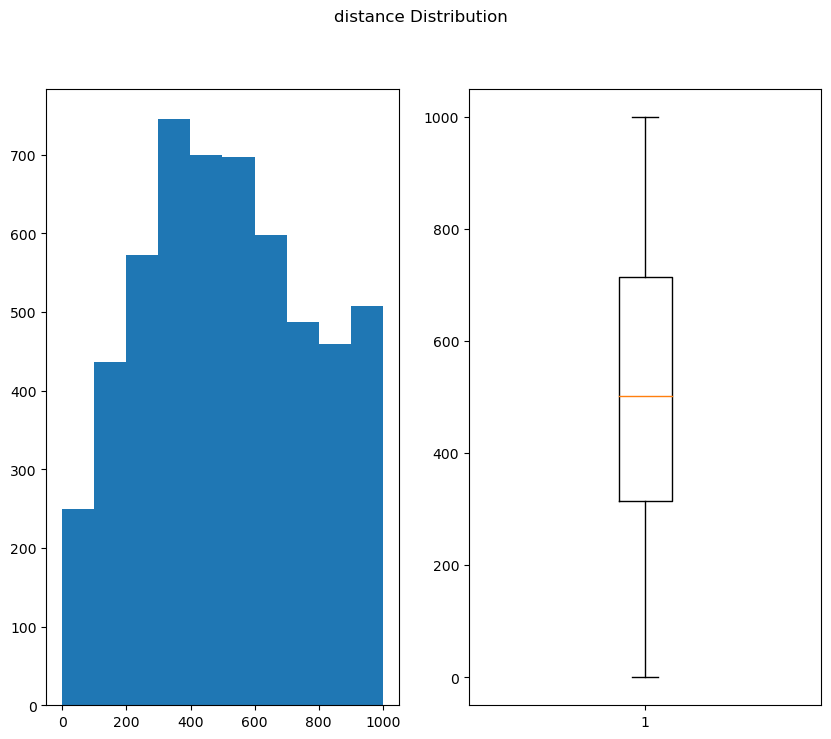

In [40]:
#distribution for distance
plot_boxplot_histogram(combined_df_final, 'distance')

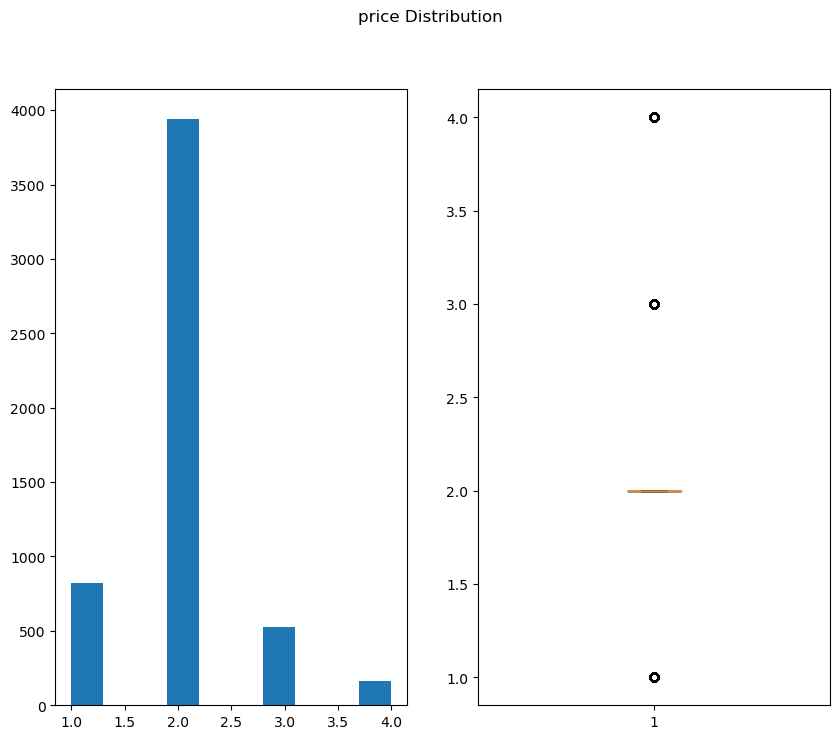

In [41]:
#distribution for price
plot_boxplot_histogram(combined_df_final, 'price')

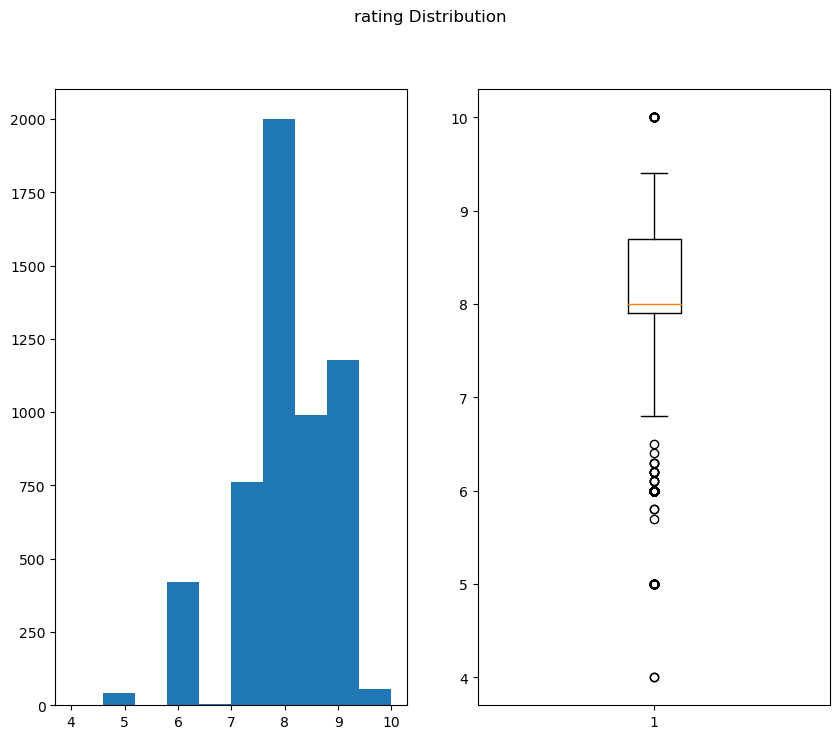

In [42]:
#distribution for rating
plot_boxplot_histogram(combined_df_final, 'rating')

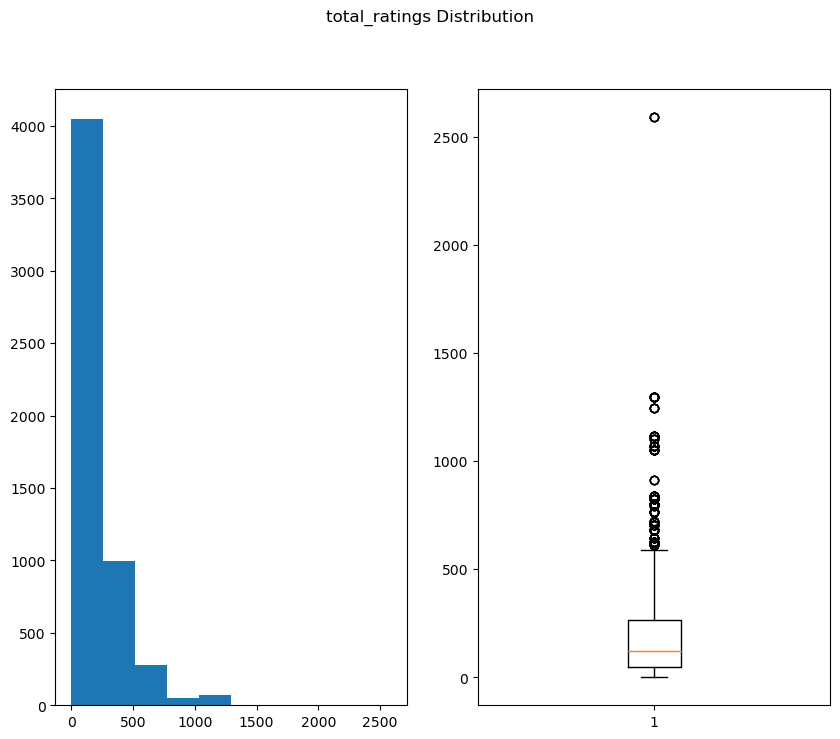

In [43]:
#distribution for total ratings
plot_boxplot_histogram(combined_df_final, 'total_ratings')

/tmp/ipykernel_215102/3858222402.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = combined_df_final.corr()


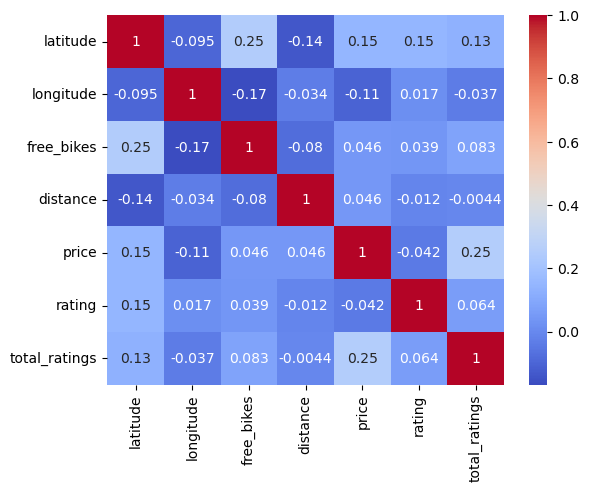

In [44]:
correlation = combined_df_final.corr()
sns.heatmap(correlation, cmap='coolwarm', annot=True)
plt.show()

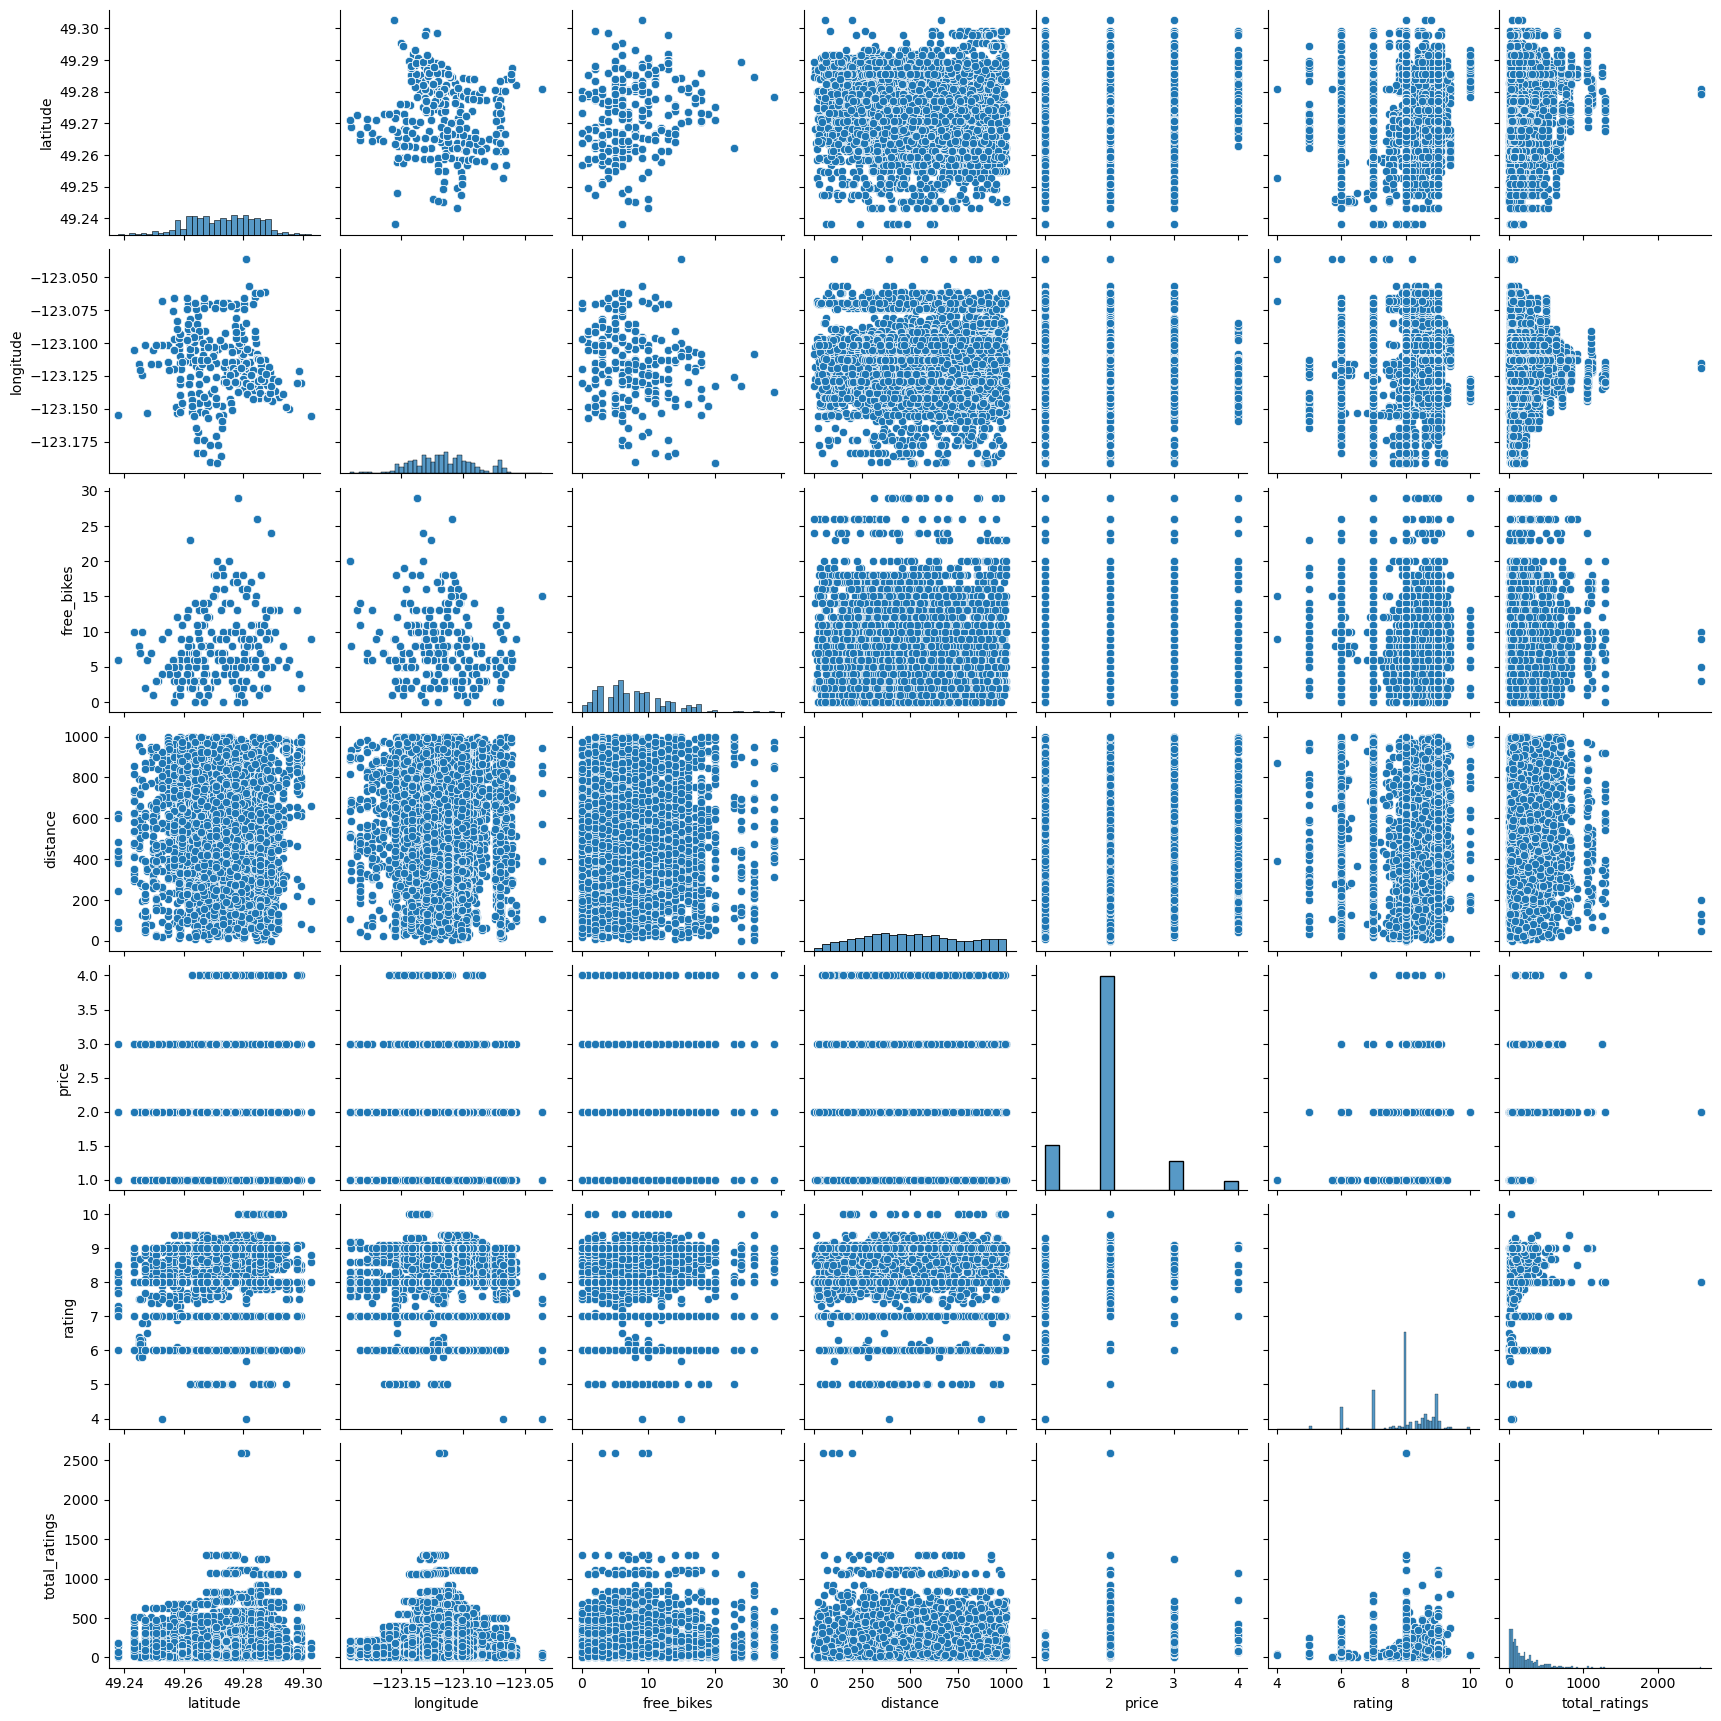

In [48]:
#scatter plot
sns.pairplot(combined_df_final)
plt.show()

No clear indications of a linear relationship

# Database

In [49]:
import sqlite3
from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("connection was successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [50]:
connection = create_connection("station_location.db")

connection was successful


In [45]:
combined_df_final.head()

,latitude,longitude,free_bikes,distance,name,price,rating,address,total_ratings
0,49.262487,-123.114397,8.0,96.0,Marulilu Cafe,2.0,8.2,"451W Broadway W (at Cambie St), Vancouver BC V...",112.0
1,49.262487,-123.114397,8.0,299.0,Aperture Coffee Bar,1.0,8.7,"243 West Broadway (at Alberta St), Vancouver B...",94.0
3,49.262487,-123.114397,8.0,430.0,Milano Coffee,2.0,9.0,"156 8th Ave W (btwn Columbia & Manitoba St), V...",121.0
5,49.262487,-123.114397,8.0,225.0,Elysian Coffee Broadway,1.0,8.2,"590 Broadway W (at Ash St), Vancouver BC V5Z 1E9",199.0
8,49.262487,-123.114397,8.0,724.0,Elysian Coffee,1.0,9.1,"2301 Ontario St (at 7th Ave), Vancouver BC V5T...",75.0


In [73]:
#need to create Id columns - Lat long and for Venue
#get lat long pairs
lat_long_list = list(zip(combined_df_final['latitude'], combined_df_final['longitude']))
#get unique pairs
unique_latlong = set(lat_long_list)

#station_id empty dict
station_id = {}

#fill in dict with unique coordinates
for coordinate in unique_latlong:
    if coordinate not in station_id:
        station_id[coordinate] = None
    else:
        pass
#initialize counter for id
station_counter = 1

#create id for each lat long pair
for station in station_id:
    station_id[station] = station_counter
    station_counter += 1

station_id

{(49.274566, -123.121817): 1,
 (49.285953, -123.124066): 2,
 (49.2731, -123.0732): 3,
 (49.287782, -123.12395): 4,
 (49.277483, -123.114279): 5,
 (49.291597, -123.129158): 6,
 (49.271471, -123.17731): 7,
 (49.261122, -123.097571): 8,
 (49.266314, -123.116011): 9,
 (49.27808, -123.130557): 10,
 (49.302577, -123.155616): 11,
 (49.275717, -123.142564): 12,
 (49.264326, -123.164725): 13,
 (49.259469, -123.145718): 14,
 (49.283298, -123.142288): 15,
 (49.261263, -123.073707): 16,
 (49.257985, -123.083366): 17,
 (49.268837, -123.177633): 18,
 (49.275679, -123.116963): 19,
 (49.256694, -123.096579): 20,
 (49.273691, -123.102232): 21,
 (49.257939, -123.089531): 22,
 (49.2856698, -123.1125432): 23,
 (49.285871, -123.12105): 24,
 (49.280852, -123.084746): 25,
 (49.238105, -123.154966): 26,
 (49.282214, -123.114101): 27,
 (49.266924, -123.173849): 28,
 (49.263242, -123.070521): 29,
 (49.272827, -123.147744): 30,
 (49.259183, -123.120126): 31,
 (49.251358, -123.115637): 32,
 (49.273568, -123.12993

In [67]:
#get unique locations using address
addresses = set(list(combined_df_final['address']))

#initialize empty dict for venues
venue_dict = {}

#append addresss to dict
for address in addresses:
    venue_dict[address] = None

#initialize counter
venue_counter = 1

#add number for keys
for venue in venue_dict:
    venue_dict[venue] = venue_counter
    venue_counter +=1

{'992 W Broadway, Vancouver, BC V5Z 1K7, Canada': 1,
 '2077 Dundas Street, Vancouver, BC V5L 1J5, Canada': 2,
 '1141 Mainland St (btwn Davie & Helmcken), Vancouver BC V6B 5P2': 3,
 '1223 Robson Street, Vancouver, BC V6E 1C2, Canada': 4,
 '1002 Seymour St (Seymour and Nelson), Vancouver BC V6B 3M6': 5,
 '943 Broadway W, Vancouver BC V5Z 4E1': 6,
 '2042 4th Ave W, Vancouver BC V6J 1M9': 7,
 '631 Commercial Dr, Vancouver BC V5L 3W3': 8,
 '1530 West Broadway (at Granville St.), Vancouver BC V6J 5K9': 9,
 '1253 Johnston Street, Vancouver, BC V6H 3R9, Canada': 10,
 '2257 E Hastings Street, Vancouver, BC V5L 1V3, Canada': 11,
 '610 Stamps Landing, Vancouver, BC V5Z 3Z1, Canada': 12,
 '1999 4th Avenue W, Vancouver, BC V6J 1M7, Canada': 13,
 '1345 Clark Dr, Vancouver BC V5L 3K9': 14,
 '1905 Cornwall Ave (at Cypress St), Vancouver BC V6J 1C8': 15,
 '1833 Anderson St (@ Granville Island Entrance), Vancouver BC V6H 4E5': 16,
 '900 Georgia St W (btwn Burrard & Hornby St), Vancouver BC V6C 2W6': 17,

In [77]:
#add lat_long column for mapping
combined_df_final['lat_long'] = list(zip(combined_df_final['latitude'], combined_df_final['longitude']))
combined_df_final

,latitude,longitude,free_bikes,distance,name,price,rating,address,total_ratings,lat_long
0,49.262487,-123.114397,8.0,96.000000,Marulilu Cafe,2.0,8.2,"451W Broadway W (at Cambie St), Vancouver BC V...",112.0,"(49.262487, -123.114397)"
1,49.262487,-123.114397,8.0,299.000000,Aperture Coffee Bar,1.0,8.7,"243 West Broadway (at Alberta St), Vancouver B...",94.0,"(49.262487, -123.114397)"
3,49.262487,-123.114397,8.0,430.000000,Milano Coffee,2.0,9.0,"156 8th Ave W (btwn Columbia & Manitoba St), V...",121.0,"(49.262487, -123.114397)"
5,49.262487,-123.114397,8.0,225.000000,Elysian Coffee Broadway,1.0,8.2,"590 Broadway W (at Ash St), Vancouver BC V5Z 1E9",199.0,"(49.262487, -123.114397)"
8,49.262487,-123.114397,8.0,724.000000,Elysian Coffee,1.0,9.1,"2301 Ontario St (at 7th Ave), Vancouver BC V5T...",75.0,"(49.262487, -123.114397)"
...,...,...,...,...,...,...,...,...,...,...
3815,49.270783,-123.141564,18.0,763.432982,Their There,2.0,8.0,"2042 West 4th Avenue, Vancouver, BC V6J 1M9, C...",113.0,"(49.270783, -123.141564)"
3816,49.270783,-123.141564,18.0,541.171382,Novo Italian,2.0,8.0,"2118 Burrard Street, Vancouver, BC V6J 3H6, Ca...",156.0,"(49.270783, -123.141564)"
3817,49.270783,-123.141564,18.0,589.139556,Charqui,2.0,5.0,"1955 Cornwall Avenue, Vancouver, BC V6J 1C9, C...",50.0,"(49.270783, -123.141564)"
3818,49.270783,-123.141564,18.0,514.785326,Grapes & Soda,2.0,9.0,"1541 W 6th Avenue, Vancouver, BC V6J 1R1, Canada",44.0,"(49.270783, -123.141564)"


In [79]:
#add ID columns to df
combined_df_final['station_id'] = combined_df_final['lat_long'].map(station_id)
combined_df_final['venue_id'] = combined_df_final['address'].map(venue_dict)
combined_df_final

,latitude,longitude,free_bikes,distance,name,price,rating,address,total_ratings,lat_long,station_id,venue_id
0,49.262487,-123.114397,8.0,96.000000,Marulilu Cafe,2.0,8.2,"451W Broadway W (at Cambie St), Vancouver BC V...",112.0,"(49.262487, -123.114397)",104,496
1,49.262487,-123.114397,8.0,299.000000,Aperture Coffee Bar,1.0,8.7,"243 West Broadway (at Alberta St), Vancouver B...",94.0,"(49.262487, -123.114397)",104,342
3,49.262487,-123.114397,8.0,430.000000,Milano Coffee,2.0,9.0,"156 8th Ave W (btwn Columbia & Manitoba St), V...",121.0,"(49.262487, -123.114397)",104,311
5,49.262487,-123.114397,8.0,225.000000,Elysian Coffee Broadway,1.0,8.2,"590 Broadway W (at Ash St), Vancouver BC V5Z 1E9",199.0,"(49.262487, -123.114397)",104,176
8,49.262487,-123.114397,8.0,724.000000,Elysian Coffee,1.0,9.1,"2301 Ontario St (at 7th Ave), Vancouver BC V5T...",75.0,"(49.262487, -123.114397)",104,439
...,...,...,...,...,...,...,...,...,...,...,...,...
3815,49.270783,-123.141564,18.0,763.432982,Their There,2.0,8.0,"2042 West 4th Avenue, Vancouver, BC V6J 1M9, C...",113.0,"(49.270783, -123.141564)",129,106
3816,49.270783,-123.141564,18.0,541.171382,Novo Italian,2.0,8.0,"2118 Burrard Street, Vancouver, BC V6J 3H6, Ca...",156.0,"(49.270783, -123.141564)",129,91
3817,49.270783,-123.141564,18.0,589.139556,Charqui,2.0,5.0,"1955 Cornwall Avenue, Vancouver, BC V6J 1C9, C...",50.0,"(49.270783, -123.141564)",129,125
3818,49.270783,-123.141564,18.0,514.785326,Grapes & Soda,2.0,9.0,"1541 W 6th Avenue, Vancouver, BC V6J 1R1, Canada",44.0,"(49.270783, -123.141564)",129,477


In [80]:
#reformat the column names
combined_df_final.rename(columns={
    'latitude': 'Latitude',
    'longitude': 'Longitude',
    'free_bikes': 'Free_Bikes',
    'distance': 'Distance',
    'name': 'Name',
    'price': 'Price',
    'rating': 'Rating',
    'address': 'Address',
    'total_ratings': 'Total_Ratings',
    'station_id': 'Station_ID',
    'venue_id': 'Venue_ID'
}, inplace=True)


,Latitude,Longitude,Free_Bikes,Distance,Name,Price,Rating,Address,Total_Ratings,lat_long,Station_ID,Venue_ID
0,49.262487,-123.114397,8.0,96.000000,Marulilu Cafe,2.0,8.2,"451W Broadway W (at Cambie St), Vancouver BC V...",112.0,"(49.262487, -123.114397)",104,496
1,49.262487,-123.114397,8.0,299.000000,Aperture Coffee Bar,1.0,8.7,"243 West Broadway (at Alberta St), Vancouver B...",94.0,"(49.262487, -123.114397)",104,342
3,49.262487,-123.114397,8.0,430.000000,Milano Coffee,2.0,9.0,"156 8th Ave W (btwn Columbia & Manitoba St), V...",121.0,"(49.262487, -123.114397)",104,311
5,49.262487,-123.114397,8.0,225.000000,Elysian Coffee Broadway,1.0,8.2,"590 Broadway W (at Ash St), Vancouver BC V5Z 1E9",199.0,"(49.262487, -123.114397)",104,176
8,49.262487,-123.114397,8.0,724.000000,Elysian Coffee,1.0,9.1,"2301 Ontario St (at 7th Ave), Vancouver BC V5T...",75.0,"(49.262487, -123.114397)",104,439
...,...,...,...,...,...,...,...,...,...,...,...,...
3815,49.270783,-123.141564,18.0,763.432982,Their There,2.0,8.0,"2042 West 4th Avenue, Vancouver, BC V6J 1M9, C...",113.0,"(49.270783, -123.141564)",129,106
3816,49.270783,-123.141564,18.0,541.171382,Novo Italian,2.0,8.0,"2118 Burrard Street, Vancouver, BC V6J 3H6, Ca...",156.0,"(49.270783, -123.141564)",129,91
3817,49.270783,-123.141564,18.0,589.139556,Charqui,2.0,5.0,"1955 Cornwall Avenue, Vancouver, BC V6J 1C9, C...",50.0,"(49.270783, -123.141564)",129,125
3818,49.270783,-123.141564,18.0,514.785326,Grapes & Soda,2.0,9.0,"1541 W 6th Avenue, Vancouver, BC V6J 1R1, Canada",44.0,"(49.270783, -123.141564)",129,477


In [81]:
#drop combined coordinates
combined_df_final.drop('lat_long', axis=1, inplace=True)

DB schema
Table = Bikes stations
    Station ID pk
    Latitude
    Longitude
    Free bikes
Table = Venue
    Venue ID pk
    Station ID pk
    Name
    Price
    Distance
    Rating
    total Ratings
    Address

In [82]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

In [86]:
#create tables for db
bike_stations = """CREATE TABLE IF NOT EXISTS BikeStations (
    Station_ID INTEGER PRIMARY KEY,
    Latitude INTEGER,
    Longitude INTEGER,
    Free_Bikes INTEGER
    );
"""

venues = """CREATE TABLE IF NOT EXISTS Venues (
    Venue_ID INTEGER PRIMARY KEY,
    Station_ID INTEGER,
    Name TEXT,
    Price INTEGER,
    Distance INTEGER,
    Rating INTEGER,
    Total_Ratings INTEGER,
    Address TEXT,
    FOREIGN KEY (Station_ID) REFERENCES BikeStations (Station_ID)
);"""


execute_query(connection, bike_stations)
execute_query(connection, venues)

Query executed successfully
Query executed successfully


Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [87]:
#create df specific to tables
my_stations = combined_df_final[['Station_ID', 'Latitude', 'Longitude', 'Free_Bikes']]
my_venues = combined_df_final[['Venue_ID', 'Station_ID', 'Name', 'Price', 'Distance', 'Rating', 'Total_Ratings', 'Address']]

In [89]:
#insert df into sql tables
my_stations.to_sql('BikeStations', connection, if_exists='replace', index=False)
my_venues.to_sql('Venues', connection, if_exists='replace', index=False)

5456

Look at the data before and after the join to validate your data.

In [90]:
#query BikeStations
station_query = """Select * from BikeStations"""

pd.read_sql(station_query, connection)

,Station_ID,Latitude,Longitude,Free_Bikes
0,104,49.262487,-123.114397,8.0
1,104,49.262487,-123.114397,8.0
2,104,49.262487,-123.114397,8.0
3,104,49.262487,-123.114397,8.0
4,104,49.262487,-123.114397,8.0
...,...,...,...,...
5451,129,49.270783,-123.141564,18.0
5452,129,49.270783,-123.141564,18.0
5453,129,49.270783,-123.141564,18.0
5454,129,49.270783,-123.141564,18.0


In [91]:
#query Venues
venue_query = """Select * from Venues"""

pd.read_sql(venue_query, connection)

,Venue_ID,Station_ID,Name,Price,Distance,Rating,Total_Ratings,Address
0,496,104,Marulilu Cafe,2.0,96.000000,8.2,112.0,"451W Broadway W (at Cambie St), Vancouver BC V..."
1,342,104,Aperture Coffee Bar,1.0,299.000000,8.7,94.0,"243 West Broadway (at Alberta St), Vancouver B..."
2,311,104,Milano Coffee,2.0,430.000000,9.0,121.0,"156 8th Ave W (btwn Columbia & Manitoba St), V..."
3,176,104,Elysian Coffee Broadway,1.0,225.000000,8.2,199.0,"590 Broadway W (at Ash St), Vancouver BC V5Z 1E9"
4,439,104,Elysian Coffee,1.0,724.000000,9.1,75.0,"2301 Ontario St (at 7th Ave), Vancouver BC V5T..."
...,...,...,...,...,...,...,...,...
5451,106,129,Their There,2.0,763.432982,8.0,113.0,"2042 West 4th Avenue, Vancouver, BC V6J 1M9, C..."
5452,91,129,Novo Italian,2.0,541.171382,8.0,156.0,"2118 Burrard Street, Vancouver, BC V6J 3H6, Ca..."
5453,125,129,Charqui,2.0,589.139556,5.0,50.0,"1955 Cornwall Avenue, Vancouver, BC V6J 1C9, C..."
5454,477,129,Grapes & Soda,2.0,514.785326,9.0,44.0,"1541 W 6th Avenue, Vancouver, BC V6J 1R1, Canada"
